<a href="https://colab.research.google.com/github/Leerish/Deep-Learning-Notebooks/blob/main/Transfer_Learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer Learning with Tensorflow part : 1 Feature Extraction

Transfer Learning is leveraging a working model's existing architecture and learned patterns for our problem.

Benefits are:
1. Can leverage an existing nueral network architecture proven to work on problems similar to ours
2. Can leverage a working nueral network architecture which has already learned patterns on similar to our own , then we can adapt those patterns to our data

In [ ]:
# Download and becoming onw with the data

import zipfile

# Download the data
!wget = https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2023-12-01 04:34:38--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-12-01 04:34:38--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.207, 108.177.127.207, 172.217.218.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  31.6MB/s    in 5.5s    

2023-12-01 04:34:43 (29.4 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]

FINISHED --2023-12-01 04:34:43--
Total wall clock time: 5.7s
Downloaded: 1 files, 161M in 5.5s (29.4 MB/s)


In [ ]:
# How many images in each folder

import os

# Walk Through 10 percent data directory and list number of files
for dirpath , dirnames , filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)}images in '{dirpath}'.")

There are 2 directories and 0images in '10_food_classes_10_percent'.
There are 10 directories and 0images in '10_food_classes_10_percent/train'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/ice_cream'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75images in '10_food_classes_10_percent/train/sushi

## Creating data loaders (preparing the data)

We will use `ImageDataGenerator`

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE=(224,224)
BATCH_SIZE=32

train_dir = "10_food_classes_10_percent/train/"
test_dir ="10_food_classes_10_percent/test/"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

print("Training Images:")
train_datagen_10 = train_datagen.flow_from_directory(train_dir,
                                                     target_size=IMAGE_SHAPE,
                                                     batch_size=BATCH_SIZE,
                                                     class_mode="categorical")
print("Test Images:")
test_data_10 = test_datagen.flow_from_directory(test_dir,
                                                target_size=IMAGE_SHAPE,
                                                batch_size=BATCH_SIZE,
                                                class_mode="categorical")



Training Images:
Found 750 images belonging to 10 classes.
Test Images:
Found 2500 images belonging to 10 classes.


## Setting up Callbacks (things to run while our model trains)

callbacks are extra functionality you can add to your models
to be performed during or after training.Some of the most popular callbacks are:
* Tracking Experiment with TensorBoard callbacks
* Model CheckPoint ( Saving a checkpoint )
* Early Stopping (Stops when a particular metric stops improving)

In [ ]:
import tensorflow as tf

import datetime

In [ ]:
# Create TensorBoard Callback (Function)

def create_callback(dirname ,experiment_name):
  """
  """

  log_dir = dirname+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to :{log_dir}")
  return tensorboard_callback

## Creating models using TensorFlow Hub

We've used tensorflow to create model layer by layer from the scratch , now we are going to acces pre-trained model from [TensorFlow Hub](tfhub.dev)

Have a Look at best models at [Papers with code](paperswithcode.com)

Browsing TensorFlow hub page which redirects to kaggle models we found this model:"https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-feature-vector/versions/2"

In [ ]:
# Let's Compare the following models

resnet_url = "https://www.kaggle.com/models/google/resnet-v2/frameworks/TensorFlow2/variations/50-feature-vector/versions/2"

efficientnet_url ="https://www.kaggle.com/models/google/efficientnet-v2/frameworks/TensorFlow2/variations/imagenet1k-b0-feature-vector/versions/2"



In [ ]:
# Importing dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [ ]:
# Let's make a model

def create_model(model_url , num_classes =10):
  """
  Takes a TensorFlow Hub URL and creates a keras Sequential model with it

  Args:
      model_url(str): A TensorFlow Hub feature extraction URL.
      num_classes(int): Number of output Neurons in the output layer
  """

  # Download the pretrained model and save it as a Keras Layer
  feature_extraction_layer = hub.KerasLayer(model_url ,
                                            trainable = False,
                                            name ="feature_extraction_layer",
                                            input_shape = IMAGE_SHAPE+(3,)) # Freeze the already learned patterns

  # Create our own model
  model = tf.keras.Sequential([
      feature_extraction_layer,
      layers.Dense(num_classes , activation="softmax" , name="output_layer")
  ])
  return model

### Creating and testing ResNet model

In [ ]:
# Create a ResNet model
resnet_model = create_model(resnet_url , num_classes = train_datagen_10.num_classes)

In [ ]:
# Compile the model
resnet_model.compile(loss = "categorical_crossentropy",
                     optimizer = tf.keras.optimizers.Adam(),
                     metrics = ["accuracy"])


In [ ]:
resnet_model.fit(train_datagen_10 ,
                 epochs = 10 ,
                 steps_per_epoch = len(train_datagen_10) ,
                 validation_data = test_data_10 ,
                 validation_steps = len(test_data_10)
                 )

Epoch 1/10
24/24 [==============================] - 26s 550ms/step - loss: 1.8618 - accuracy: 0.3867 - val_loss: 1.1676 - val_accuracy: 0.6300
Epoch 2/10
24/24 [==============================] - 11s 471ms/step - loss: 0.8722 - accuracy: 0.7533 - val_loss: 0.8264 - val_accuracy: 0.7432
Epoch 3/10
24/24 [==============================] - 14s 561ms/step - loss: 0.5985 - accuracy: 0.8360 - val_loss: 0.7410 - val_accuracy: 0.7544
Epoch 4/10
24/24 [==============================] - 13s 544ms/step - loss: 0.4654 - accuracy: 0.8680 - val_loss: 0.6970 - val_accuracy: 0.7740
Epoch 5/10
24/24 [==============================] - 10s 438ms/step - loss: 0.3672 - accuracy: 0.9093 - val_loss: 0.6791 - val_accuracy: 0.7748
Epoch 6/10
24/24 [==============================] - 11s 470ms/step - loss: 0.3101 - accuracy: 0.9347 - val_loss: 0.6494 - val_accuracy: 0.7824
Epoch 7/10
24/24 [==============================] - 13s 540ms/step - loss: 0.2538 - accuracy: 0.9560 - val_loss: 0.6330 - val_accuracy: 0.7904

In [ ]:
# Fitting our model with callbacks

resnet_history = resnet_model.fit(train_datagen_10 ,
                 epochs = 5 ,
                 steps_per_epoch = len(train_datagen_10) ,
                 validation_data = test_data_10 ,
                 validation_steps = len(test_data_10),
                 callbacks=[create_callback(dirname="tensorflow_hub" , experiment_name="resnetV250")]
                 )

Saving TensorBoard log files to :tensorflow_hub/resnetV250/20231201-052805
Epoch 1/5
24/24 [==============================] - 11s 447ms/step - loss: 0.1398 - accuracy: 0.9867 - val_loss: 0.6261 - val_accuracy: 0.7976
Epoch 2/5
24/24 [==============================] - 11s 468ms/step - loss: 0.1231 - accuracy: 0.9933 - val_loss: 0.6160 - val_accuracy: 0.8004
Epoch 3/5
24/24 [==============================] - 11s 467ms/step - loss: 0.1061 - accuracy: 0.9947 - val_loss: 0.6141 - val_accuracy: 0.8004
Epoch 4/5
24/24 [==============================] - 11s 458ms/step - loss: 0.0956 - accuracy: 0.9960 - val_loss: 0.6188 - val_accuracy: 0.7956
Epoch 5/5
24/24 [==============================] - 11s 466ms/step - loss: 0.0858 - accuracy: 0.9960 - val_loss: 0.6220 - val_accuracy: 0.7968


Our Transfer Leanring feature extractor model out performs the all the previous model buildt by hand in a quicker training time and with 10% of total data

### A Function to Plot Loss Curve


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curve(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy=history.history["accuracy"]
  val_accuracy=history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #Plot Training curve
  plt.plot(epochs , loss , label="Training Loss")
  plt.plot(epochs , val_loss , label="Validation Loss")
  plt.title("Loss Curve")
  plt.xlabel("Epochs")
  plt.legend()

  #Plot Validation Curve
  plt.figure()
  plt.plot(epochs , accuracy , label="Training accuracy")
  plt.plot(epochs , val_accuracy , label="Validation accuracy")
  plt.title("Accuracy Curve")
  plt.xlabel("Epochs")
  plt.legend()

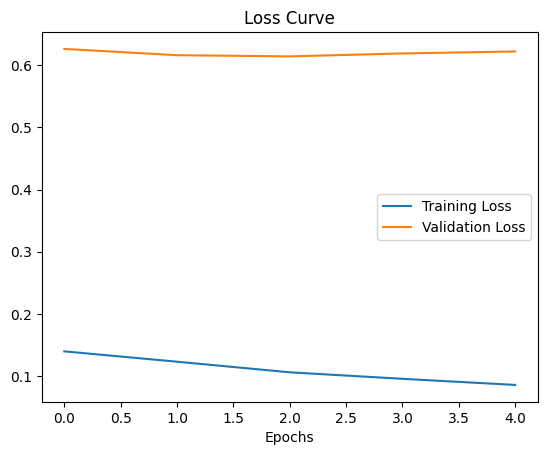

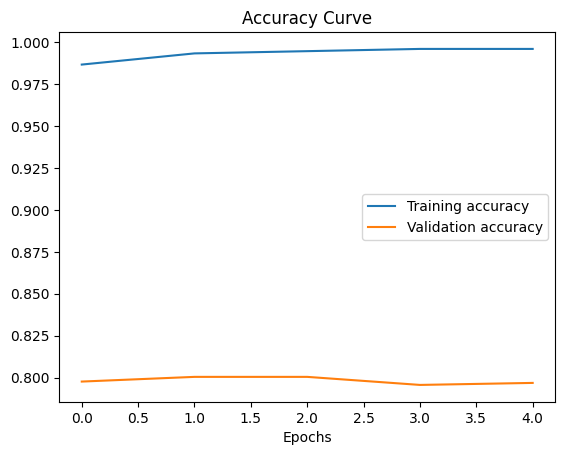

In [ ]:
plot_loss_curve(resnet_history)


###Creating and testing Efficientnet model

In [ ]:
# Create model
efficientnet_model = create_model(efficientnet_url)

In [ ]:
# Compile the model
efficientnet_model.compile(loss = "categorical_crossentropy",
                           optimizer = tf.keras.optimizers.Adam(),
                           metrics=["accuracy"])

In [ ]:
# Fitting the model
eff_history = efficientnet_model.fit(train_datagen_10,
                                     epochs = 5,
                                     steps_per_epoch=len(train_datagen_10),
                                     validation_data=test_data_10,
                                     validation_steps=len(test_data_10),
                                     callbacks=[create_callback(dirname="tensorflow_hub" , experiment_name="efficientnetV2")])

Saving TensorBoard log files to :tensorflow_hub/efficientnetV2/20231201-055544
Epoch 1/5
24/24 [==============================] - 22s 556ms/step - loss: 1.9284 - accuracy: 0.3693 - val_loss: 1.4737 - val_accuracy: 0.6308
Epoch 2/5
24/24 [==============================] - 10s 435ms/step - loss: 1.2772 - accuracy: 0.6840 - val_loss: 1.0986 - val_accuracy: 0.7140
Epoch 3/5
24/24 [==============================] - 13s 539ms/step - loss: 0.9858 - accuracy: 0.7653 - val_loss: 0.9329 - val_accuracy: 0.7460
Epoch 4/5
24/24 [==============================] - 12s 535ms/step - loss: 0.8280 - accuracy: 0.8013 - val_loss: 0.8451 - val_accuracy: 0.7592
Epoch 5/5
24/24 [==============================] - 10s 406ms/step - loss: 0.7213 - accuracy: 0.8453 - val_loss: 0.7896 - val_accuracy: 0.7712


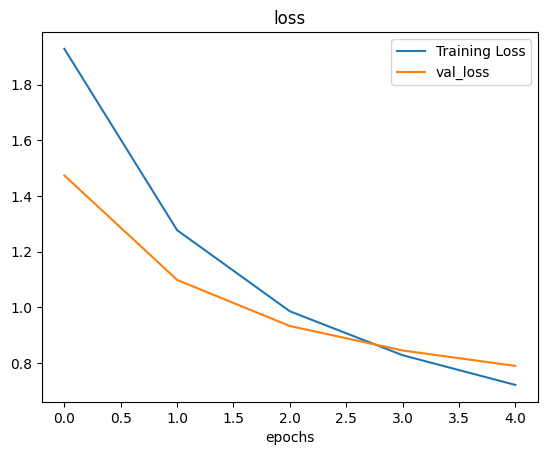

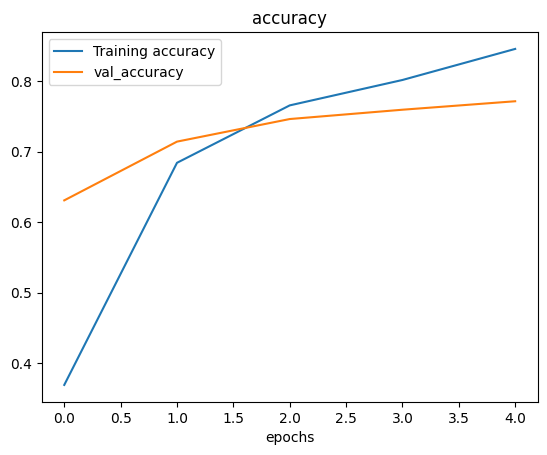

In [ ]:
plot_loss_curve(eff_history)

In [ ]:
efficientnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 1280)              5919312   
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 5932122 (22.63 MB)
Trainable params: 12810 (50.04 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (  (None, 2048)              23564800  
 KerasLayer)                                                     
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23585290 (89.97 MB)
Trainable params: 20490 (80.04 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


## Different Types of Transfer Learning
* "As is" transfer learning - using an existing model with no changes what so ever
* "Feature Extraction" - use prelearned patterns of existing model and adjust the output layer for our problem.
* "Fine Tunning" - use prelearned patterns of existing model and "fine-tune" underlying models

In [ ]:
efficientnet_model.layers[0]

In [ ]:
len(efficientnet_model.layers[0].weights)

359

## Comparing the model results using TensorBoard

> **Note:** While uploading stuffs to TensorBoard.dev , your experiments are public

In [ ]:
# Upload TensorBoard dev records
! tensorboard dev upload --logdir ./tensorflow_hub --name "EfficientNetB0 vs ResNet50V2" --description "Comparing two different TF hub feature extraction model architectures using 10% of training data" --one_shot
